In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas.io.json import json_normalize





# Importando os arquivos json para o codigo

with open('offline_sales.json') as f:
    offline_sales = pd.DataFrame(json.loads(line) for line in f)
    
with open('online_orders.json') as f:
    online_orders = pd.DataFrame(json.loads(line) for line in f)
    
customer_id_array = []
with open('online_pageviews.json') as f:
    for line in f:
        customer_id_array.append(json.loads(line)['customer_id'])
online_pageviews = pd.DataFrame(customer_id_array,columns = ['customer_id']) # Dataframe apenas com a coluna 'customer_id' do online_pageviews.json
    

quantidade_maxima_offline = offline_sales['quantity'].max() #quantidade maxima de quantidades compradas offline
quantidade_maxima_online = online_orders['quantity'].max()  #quantidade maxima de quantidades compradas online


# Codigo para questao 1


def soma_faturamento_offline():
    soma = 0
    for i in range(1,quantidade_maxima_offline+1):
        dataframe_i = offline_sales[offline_sales['quantity']==i] # Dataframe filtrado em 'quantity' = i
        soma += sum(dataframe_i.price)*(i)                        # A soma dos preços e multiplicado pela sua quantidade vendida
    return (soma)
    
def soma_faturamento_online():
    soma = 0
    for i in range(1,quantidade_maxima_online+1):
        dataframe_i = online_orders[online_orders['quantity']==i] # Mesma logica do soma_faturamento_offline
        soma += sum(dataframe_i.price)*(i)
    return (soma)

def faturamento_total(): # O faturamento total eu deduzo que seja a soma dos preços dos itens vendidos offline e online
    return (soma_faturamento_online() + soma_faturamento_offline())

print("          Questao 1\n")
print("O faturamento total do mês foi de: R$ %.2f" % round(faturamento_total(),2) + " reais" "\n")


# Codigo para questao 2

def produto_mais_comprado_online():      
    lista=[]
    quantity_e_id = online_orders[['quantity','on_product_id']]
    for id_produto in online_orders.on_product_id:
        lista.append([sum(quantity_e_id[quantity_e_id['on_product_id']==str(id_produto)].quantity),id_produto])
        
    return lista


lista_mais_comprado=produto_mais_comprado_online()
print("          Questao 2\n")
print("O produto mais comprado do mês foi o de id: " + str(max(lista_mais_comprado)[1]) + " com " + str(max(lista_mais_comprado)[0])+" vendas." +"\n")

# Codigo para questao 3

def estado_fimDeSemana_vende(estado):
    
    data_frame_state_offline = offline_sales[offline_sales['state']==str(estado)]['date']   # Filtrar para datas de compras offline apenas no estado informado
    state_offline_frequencia = data_frame_state_offline.value_counts() # Dataframe das frequencias de compra no mes, desde o dia que menos vendeu até o dia que mais vendeu
    
    fim_de_semana = pd.DataFrame({'Sexta' : ["2018-08-03", "2018-08-10", "2018-08-17", "2018-08-24", "2018-08-31"],
                                  'Sabado' : ["2018-08-04","2018-08-11","2018-08-18","2018-08-25","0"],
                                  'Domingo' : ["2018-08-05","2018-08-12","2018-08-19","2018-08-26","0"]})
    media_sexta = round(state_offline_frequencia.loc[fim_de_semana["Sexta"]].mean(),2)
    media_sabado = round(state_offline_frequencia.loc[fim_de_semana["Sabado"]].mean(),2)
    media_domingo = round(state_offline_frequencia.loc[fim_de_semana["Domingo"]].mean(),2)
    print("Media total de vendas no mes por dia em " + str(estado) + ": %.2f" % round(state_offline_frequencia.mean(),2) + "\n" +
          "Media de vendas na sexta em " + str(estado) + ": " + str(media_sexta) + "\n" +
          "Media de vendas no sabado em " + str(estado) + ": " + str(media_sabado) + "\n"+
          "Media de vendas no domingo em " + str(estado) + ": " + str(media_domingo) + "\n"+
          "Media dos fins de semana em " + str(estado) + ": " + str(round((media_sexta + media_sabado + media_domingo)/3,2)) + "\n")

print("          Questao 3\n")
estado_fimDeSemana_vende("RJ")      

# Codigo para questao 4

offline_sales_filtrado = offline_sales.dropna().customer_id.drop_duplicates()       #  }
online_pageviews_filtrado = online_pageviews.dropna().customer_id.drop_duplicates() #  }==== Id's sem valores nulos e repetidos
online_orders_filtrado =  online_orders.dropna().customer_id.drop_duplicates()      #  }
                
                           # Visitaram a pagina e:
optaram_fisica = 0         # Optou em comprar na loja fisica
nao_optaram_fisica = 0     # Nao optou em comprar na loja fisica

optaram_online = 0         # Optou em comprar online
nao_optaram_online = 0     # Nao optou em comprar online
nao_optou_nenhuma = 0      # Nao optou em comprar nem na online nem na fisica

def soma_optar_loja_fisica_e_online():  # Altera o valor das variaveis acima, atribuindo a soma apenas dos clientes que visitaram a pagina
    global optaram_fisica
    global nao_optaram_fisica
    global optaram_online
    global nao_optaram_online
    global nao_optou_nenhuma
    
    for i in online_pageviews_filtrado:  # i assumira todos os valores customer_id
        if online_orders_filtrado.isin([i]).any().any():     # Retorna True se i (customer_id) pertence a offline_sales
            optaram_online+=1
        if not online_orders_filtrado.isin([i]).any().any():
            nao_optaram_online+=1
        if offline_sales_filtrado.isin([i]).any().any():
            optaram_fisica+=1
        if not offline_sales_filtrado.isin([i]).any().any():
            nao_optaram_fisica+=1
        if not offline_sales_filtrado.isin([i]).any().any() and not online_orders_filtrado.isin([i]).any().any():
            nao_optou_nenhuma+=1

soma_optar_loja_fisica_e_online()

print("          Questao 4\n")
print("O numero de clientes que visitaram a pagina e compraram na loja fisica é: " + str(optaram_fisica))
print("O numero de clientes que visitaram a pagina e NAO compraram na loja fisica é: " + str(nao_optaram_fisica))
percentual_optaram_fisica = optaram_fisica/(optaram_fisica+nao_optaram_fisica)*100
percentual_optaram_online = optaram_online/(optaram_online+nao_optaram_online)*100
print("Ou seja, %.2f" % round(percentual_optaram_fisica,2) + "% visitaram o site e compraram na loja fisica.")
print("Enquanto que %2.f" % round(percentual_optaram_online,2) + "% dos usuarios identificaveis (id's não nulos) visitaram o site e compraram online.\n")


# Codigo para questao 5

def visitaram_mas_nao_compraram(): # Clientes que acessaram o site, porem nao compraram na loja online
    return nao_optaram_online
    


print("          Questao 5\n")
print("Numero de clientes que acessaram o site, porem nao compraram na loja online: "+str(visitaram_mas_nao_compraram()))

media_precos_loja_fisica = round(offline_sales['price'].mean(),2)
percentual_estimado = round(percentual_optaram_fisica+5,2)

print("Supondo que " + str(percentual_estimado) + "% das pessoas que abandonaram o carrinho participem da campanha, e que todas gastem uma media de "+str(round(media_precos_loja_fisica,2))+", com o desconto de 20% fica uma media de "+str(round(media_precos_loja_fisica*0.8,2))+" por compra.")
numero_de_pessoas = round(nao_optaram_online*percentual_estimado/100,2)
print("A campanha na loja fisica terá um faturamento de: "+str(round(numero_de_pessoas*media_precos_loja_fisica*0.8,2)))
    
    
    
    
    
    

          Questao 1

O faturamento total do mês foi de: R$ 19552328.32 reais

          Questao 2

O produto mais comprado do mês foi o de id: 626664333563363 com 74 vendas.

          Questao 3

Media total de vendas no mes por dia em RJ: 286.03
Media de vendas na sexta em RJ: 361.8
Media de vendas no sabado em RJ: 361.25
Media de vendas no domingo em RJ: 69.5
Media dos fins de semana em RJ: 264.18

          Questao 4

O numero de clientes que visitaram a pagina e compraram na loja fisica é: 592
O numero de clientes que visitaram a pagina e NAO compraram na loja fisica é: 5321
Ou seja, 10.01% visitaram o site e compraram na loja fisica.
Enquanto que 60% dos usuarios identificaveis (id's não nulos) visitaram o site e compraram online.

          Questao 5

Numero de clientes que acessaram o site, porem nao compraram na loja online: 2383
Supondo que 15.01% das pessoas que abandonaram o carrinho participem da campanha, e que todas gastem uma media de 468.06, com o desconto de 20% fica u

In [128]:
offline_sales[offline_sales['quantity']==2]

,date,state,store_id,sale_id,off_product_id,quantity,price,customer_id
79,2018-08-01,RS,3561636,303433383834633,623963303161316,2,138.0,64303065363239616431
116,2018-08-01,RJ,3630316,313237653263646,306666396162363,2,6390.0,62373833313031383163
125,2018-08-01,RS,3639343,323763393562366,333135626136306,2,169.0,30323162333538633032
133,2018-08-01,RS,3639343,386133336232336,393739626339643,2,119.0,30366664643862386332
182,2018-08-01,SP,3639373,386136343931633,393635616566393,2,298.0,None
...,...,...,...,...,...,...,...,...
28941,2018-08-31,RJ,3964313,633330663039643,353033396564613,2,238.0,62343236643264346264
28949,2018-08-31,MA,3966336,376635353463326,323531386239613,2,29.0,None
28964,2018-08-31,MA,3966336,653261353461343,653730303034323,2,98.0,None
29112,2018-08-31,RJ,6234643,303231636238383,373631326161383,2,598.0,63636665643236333834


In [155]:
def produto_mais_comprado_online():      
    lista = pd.DataFrame()
    quantity_e_id = online_orders[['quantity','on_product_id']]
    i = 0
    for id_produto in online_orders.on_product_id:
        lista.set_value(id_produto,'quantity',sum(quantity_e_id[quantity_e_id['on_product_id']==str(id_produto)].quantity))
        
    return lista
print(produto_mais_comprado_online().sort_values(by="quantity",ascending = False).head(10))

                 quantity
626664333563363      74.0
376531636530353      51.0
656136316465643      50.0
396464373131666      47.0
656662626334303      45.0
343033316438393      45.0
393665363031353      45.0
316634393832653      44.0
633336383230346      41.0
613862646363323      40.0


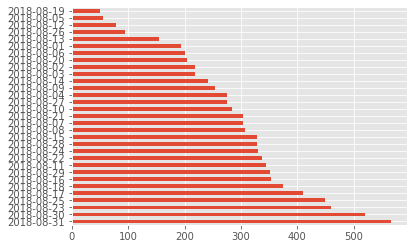

In [161]:
data_frame_state_offline = offline_sales[offline_sales['state']=="RJ"]['date']
state_offline_frequencia = data_frame_state_offline.value_counts()
plt.style.use('ggplot')
state_offline_frequencia.plot.barh()

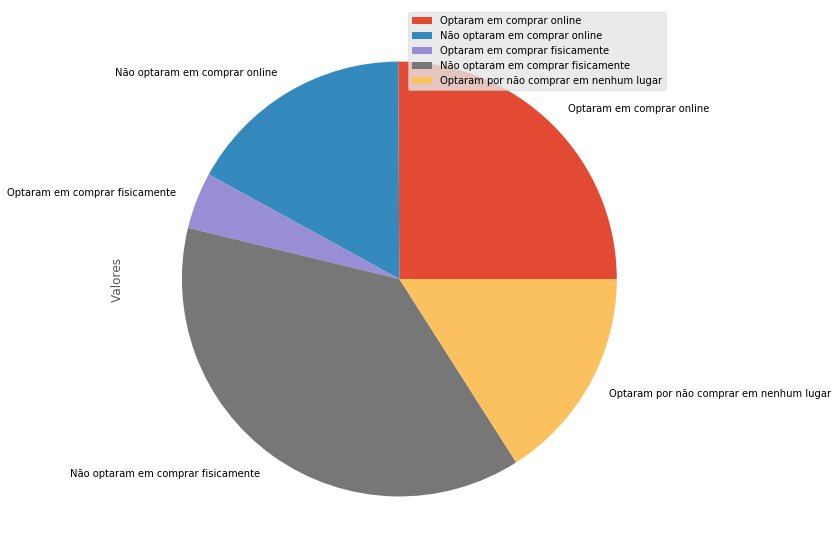

In [203]:
lista = pd.DataFrame({'Valores':[optaram_online,nao_optaram_online,optaram_fisica,nao_optaram_fisica,nao_optou_nenhuma]},
                    index=['Optaram em comprar online','Não optaram em comprar online','Optaram em comprar fisicamente','Não optaram em comprar fisicamente','Optaram por não comprar em nenhum lugar'])


lista.plot.pie(y='Valores',figsize=(10,10))